In [26]:
from DSClustering import DSClustering
from sklearn.datasets import load_wine, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import pandas as pd

In [27]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
n_clusters = 5
kmeans = KMeans(n_clusters= n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
clustering = DSClustering(X, n_clusters=n_clusters, clusters_algorithms=[kmeans, agglomerative, spectral])
clustering.compute_clusters()
clustering.compare_clusters()
clustering.normalize_clusters()
print("Normalized Clusters:")
clustering.compare_clusters()

Contingency Table between 'KMeans' and 'AgglomerativeClustering':
AgglomerativeClustering   0   1   2   3   4
KMeans                                     
0                         0   0   0  12   0
1                        50   0   0   0   0
2                         0   2  36   0   1
3                         0   0   1   0  23
4                         0  24   1   0   0

Contingency Table between 'KMeans' and 'SpectralClustering':
SpectralClustering   0   1   2   3   4
KMeans                                
0                    0   0   0  12   0
1                    0   0  29   0  21
2                    3  36   0   0   0
3                    0   1   0  23   0
4                   25   0   0   0   0

Contingency Table between 'AgglomerativeClustering' and 'SpectralClustering':
SpectralClustering        0   1   2   3   4
AgglomerativeClustering                    
0                         0   0  29   0  21
1                        26   0   0   0   0
2                         2  36   0 

/home/dani/Documents/GitHub/trabajo-dirigido/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [28]:
labels = clustering.fit_dsc(threshold=0.5)

Number of elements in each cluster:
Cluster 0: 45 elements
Cluster 1: 129 elements
Cluster 2: 114 elements
Cluster 3: 83 elements
Cluster 4: 79 elements
Optimization started
Processing epoch	74	0.0424	
Training time: 5.95s, epochs: 74

Least training loss reached: 0.043


Most important rules for class 0

	[0.758] R3: sepal length (cm) > 6.400
			0: 0.575	1: 0.000	2: 0.012	3: 0.413	4: 0.000	Unc: 0.000

	[0.519] R11: petal length (cm) > 4.945
			0: 0.291	1: 0.000	2: 0.234	3: 0.398	4: 0.000	Unc: 0.077

Most important rules for class 1

	[0.710] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.000	1: 0.520	2: 0.012	3: 0.000	4: 0.437	Unc: 0.031

	[0.622] R0: sepal length (cm) < 5.287
			0: 0.093	1: 0.452	2: 0.000	3: 0.000	4: 0.312	Unc: 0.143

	[0.593] R12: petal width (cm) < 0.687
			0: 0.042	1: 0.572	2: 0.000	3: 0.000	4: 0.000	Unc: 0.385

	[0.561] R7: sepal width (cm) > 3.350
			0: 0.067	1: 0.529	2: 0.000	3: 0.000	4: 0.000	Unc: 0.404

	[0.544] R8: petal length (cm) < 2.571
			0: 0.040	1: 0.5

In [29]:
#calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")
#comparamos con silhouette score de kmeans
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_avg = silhouette_score(X, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette_avg}")
#comparamos con silhouette score de agglomerative
agglomerative_labels = agglomerative.fit_predict(X)
agglomerative_silhouette_avg = silhouette_score(X, agglomerative_labels)
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette_avg}")
#comparamos con silhouette score de spectral
spectral_labels = spectral.fit_predict(X)
spectral_silhouette_avg = silhouette_score(X, spectral_labels)
print(f"Spectral Silhouette Score: {spectral_silhouette_avg}")

Silhouette Score: 0.37098624952353854
KMeans Silhouette Score: 0.36406261926440026
Agglomerative Silhouette Score: 0.4843825892790594
Spectral Silhouette Score: 0.3688999624175438


/home/dani/Documents/GitHub/trabajo-dirigido/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


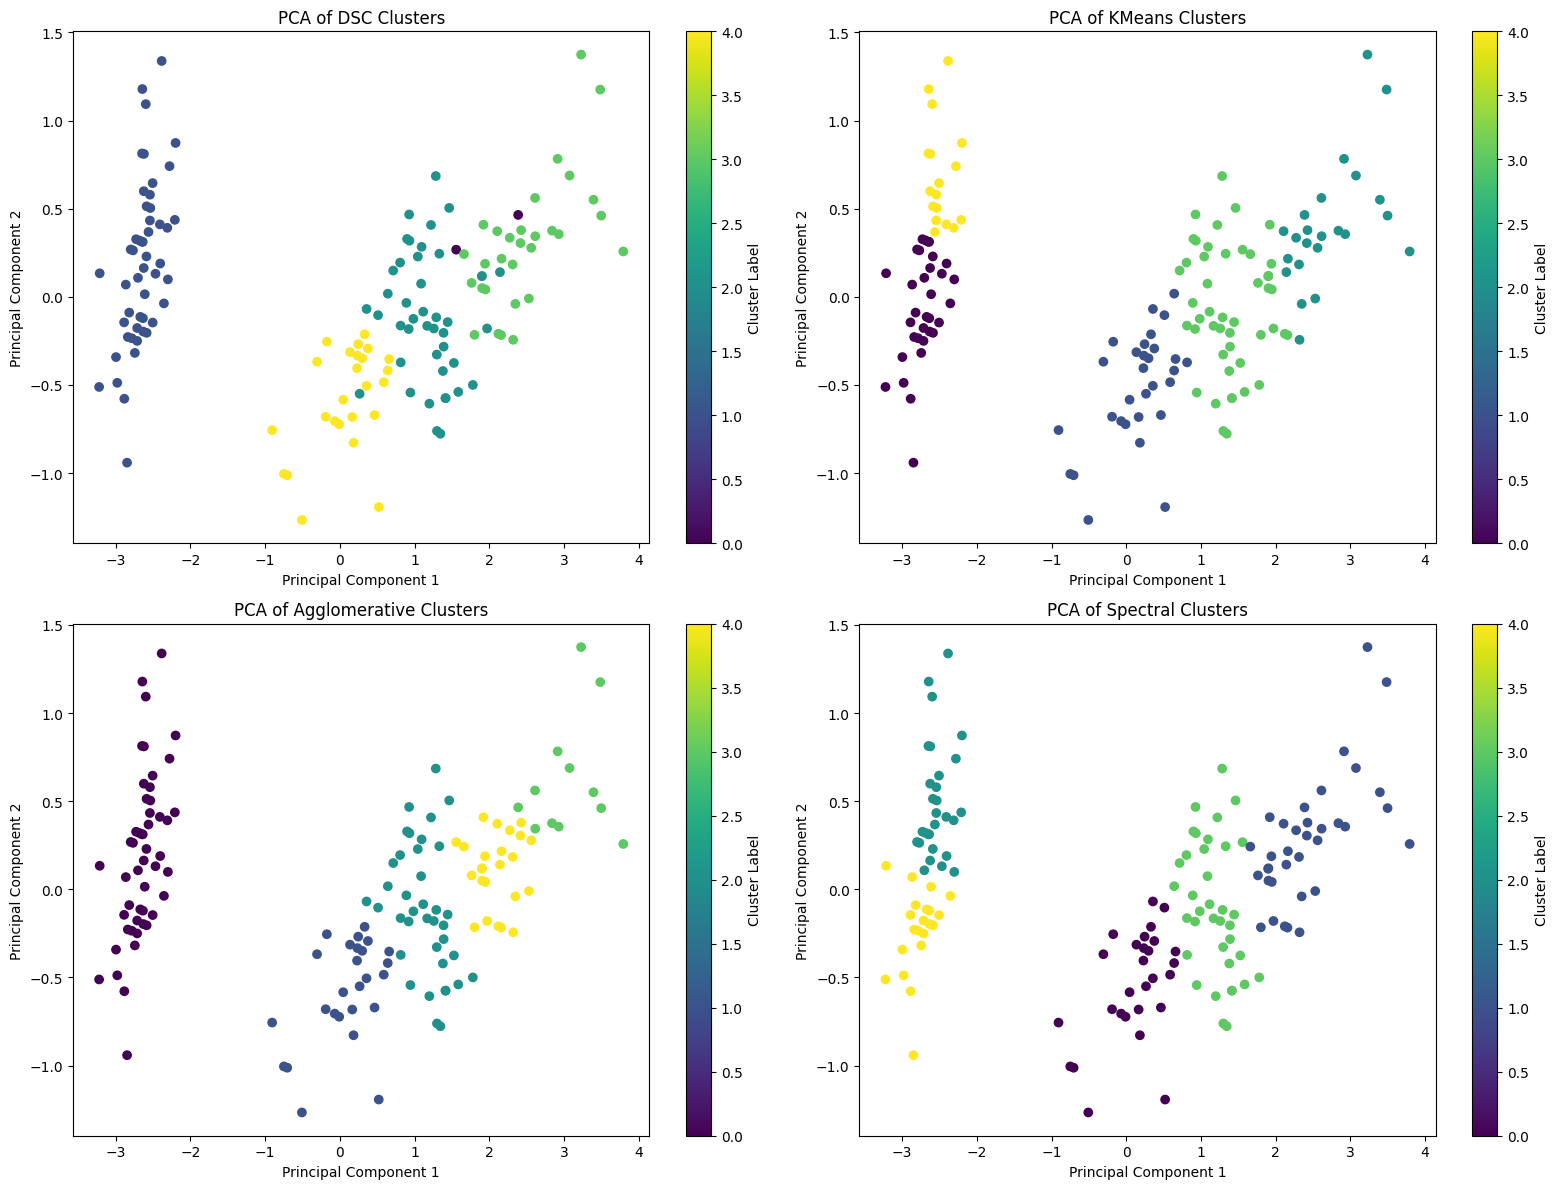

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plotting the PCA results

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# DSC Clusters
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
axs[0, 0].set_title('PCA of DSC Clusters')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])
cbar.set_label('Cluster Label')

# KMeans Clusters
axs[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0, 1].set_title('PCA of KMeans Clusters')
axs[0, 1].set_xlabel('Principal Component 1')
axs[0, 1].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])
cbar.set_label('Cluster Label')

# Agglomerative Clusters
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis')
axs[1, 0].set_title('PCA of Agglomerative Clusters')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])
cbar.set_label('Cluster Label')

# Spectral Clusters
axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='viridis')
axs[1, 1].set_title('PCA of Spectral Clusters')
axs[1, 1].set_xlabel('Principal Component 1')
axs[1, 1].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])
cbar.set_label('Cluster Label')

plt.tight_layout()
plt.show()
